In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from skimage import data
import os 
import cv2
from os import listdir
from os.path import isfile, join
from tensorflow.keras import layers
from sklearn.utils import shuffle
import keras as K
from keras.layers import Flatten, Dense, Input
from keras.models import Model
from keras.preprocessing import sequence, image
from google.colab import drive
drive.mount('/content/drive')

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [264]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
                             
                             samplewise_center=True,
                             rescale=1. / 255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             rotation_range=15,
                             fill_mode='nearest',
                             width_shift_range=0.1,
                             height_shift_range=0.1
                              
                             
                             )


train_generator = datagen.flow_from_directory(
        'drive/My Drive/new_training_2',  # this is the target directory
        color_mode="rgb",
        target_size=(200, 200),  # all images will be resized to 150x150
        batch_size=100,
        shuffle=True,
        class_mode='categorical',
        seed=50,
        classes=['jeans','saree','sunglasses','tshirt']
        
        )


validation_generator = datagen.flow_from_directory(
        'drive/My Drive/new_validation_2',  # this is the target directory
        color_mode="rgb",
        target_size=(200, 200),  # all images will be resized to 150x150
        batch_size=100,
        shuffle=True,
        class_mode='categorical',
        seed=50,
        classes=['jeans','saree','sunglasses','tshirt']
        )


Found 3257 images belonging to 4 classes.
Found 475 images belonging to 4 classes.


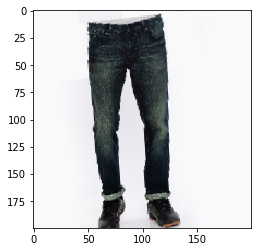

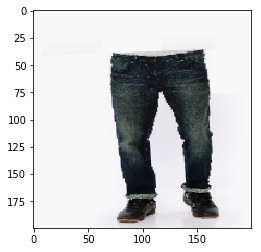

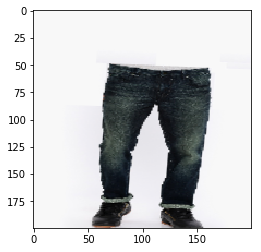

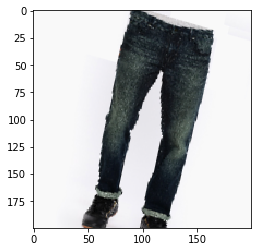

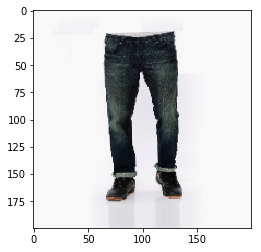

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img_path = 'drive/My Drive/jeans2.jpg'
img = load_img(img_path, target_size=(200, 200))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3) rgb channels define 
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3) padding 1 

# The .flow() command below generates batches of randomly transformed images
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 5 == 0:
    break

In [4]:

import tensorflow as tf
import os
import keras
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization
from keras import backend as K
img_width, img_height = 200, 200


if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


model = Sequential()

#model.add(Conv2D(64, kernel_size=(3, 3),strides=(1),padding='same',input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3),input_shape=input_shape))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


#model.add(Conv2D(32, (3, 3),strides=(1),padding='same'))
model.add(Conv2D(32, (3, 3)))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(16, (3, 3)))
model.add(Conv2D(16, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(8))
model.add(BatchNormalization())
model.add(Activation('relu'))          
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))


filepath="weights_best.hdf5" # checkpoint
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')


#checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')  

model.compile(
          #optimizer=keras.optimizers.SGD(lr=0.001,momentum=0.9, nesterov=True),      
          optimizer='adam',
          loss='categorical_crossentropy',
          metrics=['categorical_accuracy'])



model.summary(line_length=200)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
________________________________________________________________________________________________________________________________________________________________________________________________________
Layer (type)                                                                              Output Shape                                                                    Param #                       
conv2d_1 (Conv2D)                                                                         (None, 198, 198, 64)                                                            1792                          
________________________________________________________________________________________________________________________________________________________________________________________________________
conv2d_2 

In [5]:
final_model=model.fit_generator(train_generator,
                    steps_per_epoch=train_generator.samples //100,
                    validation_data = validation_generator,
                    validation_steps=validation_generator.samples // 100,
                    epochs=50,
                    verbose=1,
                    shuffle=True,
                    callbacks=[checkpoint])

model.save('weights_best1.hdf5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/50


/usr/local/lib/python2.7/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


32/32 [==============================] - 1041s 33s/step - loss: 1.1520 - categorical_accuracy: 0.5469 - val_loss: 0.8682 - val_categorical_accuracy: 0.7750

Epoch 00001: val_categorical_accuracy improved from -inf to 0.77500, saving model to weights_best.hdf5
Epoch 2/50
32/32 [==============================] - 81s 3s/step - loss: 0.9200 - categorical_accuracy: 0.6687 - val_loss: 0.8409 - val_categorical_accuracy: 0.6880

Epoch 00002: val_categorical_accuracy did not improve from 0.77500
Epoch 3/50
32/32 [==============================] - 66s 2s/step - loss: 0.8260 - categorical_accuracy: 0.6977 - val_loss: 0.7522 - val_categorical_accuracy: 0.7680

Epoch 00003: val_categorical_accuracy did not improve from 0.77500
Epoch 4/50
32/32 [==============================] - 67s 2s/step - loss: 0.7662 - categorical_accuracy: 0.7276 - val_loss: 0.6736 - val_categorical_accuracy: 0.7573

Epoch 00004: val_categorical_accuracy did not improve from 0.77500
Epoch 5/50
32/32 [==========================

In [0]:
from keras.models import load_model
#model =load_model('drive/My Drive/final_try3')
model =load_model('weights_best.hdf5')

[1]
[[0.01017318 0.9800295  0.00126999 0.00852726]]
------------------------------------------------------------------


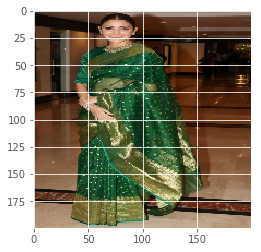

In [40]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np 
#glasses3
#glasses6
#tshirt
#tshirt4
#saree
#saree2
#jeans
#jeans2
img = cv2.imread('drive/My Drive/saree.jpg')
img=cv2.cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(200,200))
img = np.reshape(img,[200,200,3])
img = img/255.
classes=model.predict_classes(np.expand_dims(img, axis=0))
print (classes)
classes=model.predict(np.expand_dims(img, axis=0))
#train_generator.class_indices
print (classes)
print ("------------------------------------------------------------------")
plt.imshow(img)


In [24]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#weights_file = drive.CreateFile({'title' : 'after_presentation_final'})
weights_file.SetContentFile('weights_best.hdf5')
#weights_file.Upload()
#drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': u'1uWi9xDEQy2oJYVvQxoTp8dW4XVJetPII'})

In [303]:
test_generator= datagen.flow_from_directory(
        'drive/My Drive/new_testing_2',
        color_mode="rgb",
        target_size=(200, 200),
        class_mode='categorical',
        batch_size=32,
        #shuffle=True,
        classes=['jeans','saree','sunglasses','tshirt']
          )


Found 192 images belonging to 4 classes.


In [304]:
predicted_scores = model.predict_generator(test_generator, test_generator.samples//32)
Evaluate_score = model.evaluate_generator(test_generator , test_generator.samples //32, pickle_safe=False)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `evaluate_generator` call to the Keras 2 API: `evaluate_generator(<keras_pre..., 6, use_multiprocessing=False)`
  


In [305]:
print (predicted_scores)
print ("****************************************************************************")
print ("****************************************************************************")
print (Evaluate_score)
print(model.metrics_names)

[[2.72641378e-03 9.39110994e-01 2.05336837e-03 5.61092421e-02]
 [1.00214267e-03 6.39469363e-03 9.04631510e-04 9.91698503e-01]
 [2.85300659e-03 9.88904774e-01 6.44011889e-04 7.59823574e-03]
 [9.89428580e-01 2.07610615e-03 3.35708610e-03 5.13814669e-03]
 [2.58323923e-02 4.23084348e-01 2.02896502e-02 5.30793548e-01]
 [9.23509598e-01 2.49247197e-02 1.12412805e-02 4.03244272e-02]
 [4.21596087e-05 4.44926001e-04 9.99067008e-01 4.45907703e-04]
 [9.70508397e-01 1.14106387e-02 5.79257822e-03 1.22883404e-02]
 [2.21404131e-03 8.18063617e-02 1.79157797e-02 8.98063838e-01]
 [7.55908957e-04 9.97749984e-01 1.84862074e-04 1.30932988e-03]
 [9.44409609e-01 3.56701575e-02 1.63215604e-02 3.59865883e-03]
 [1.65024959e-02 6.22960851e-02 1.96542442e-02 9.01547194e-01]
 [1.17354200e-03 9.96681511e-01 4.44141479e-04 1.70080026e-03]
 [6.09339364e-02 7.73012415e-02 1.92716643e-01 6.69048250e-01]
 [8.48986791e-04 4.46516788e-03 9.89022374e-01 5.66352438e-03]
 [9.56716061e-01 3.86372991e-02 5.29522309e-04 4.117096

In [0]:
##tensorboard

!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

get_ipython().system_raw('./ngrok http 6006 &')

! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True, show_layer_names=True)

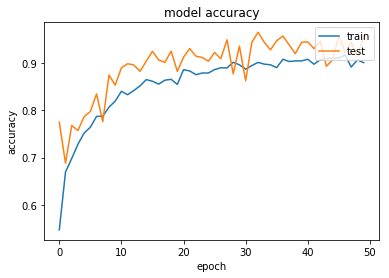

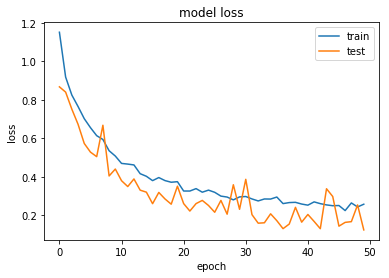

In [22]:
import matplotlib.pyplot as plt
plt.plot(final_model.history['categorical_accuracy'])
plt.plot(final_model.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# summarize history for loss
plt.plot(final_model.history['loss'])
plt.plot(final_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

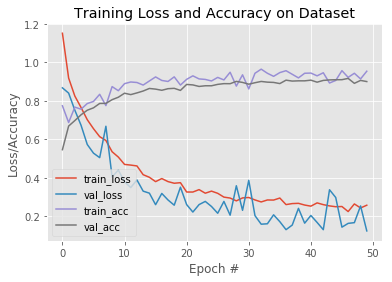

In [23]:
# plot the training loss and accuracy
#N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(final_model.history["loss"], label="train_loss")
plt.plot(final_model.history["val_loss"], label="val_loss")
plt.plot(final_model.history["val_categorical_accuracy"], label="train_acc")
plt.plot(final_model.history["categorical_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

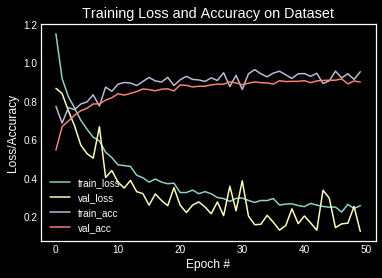

In [309]:
# plot the training loss and accuracy
#N = NUM_EPOCHS
plt.style.use("dark_background")
plt.figure()
plt.plot(final_model.history["loss"], label="train_loss")
plt.plot(final_model.history["val_loss"], label="val_loss")
plt.plot(final_model.history["val_categorical_accuracy"], label="train_acc")
plt.plot(final_model.history["categorical_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [0]:
#to save training history of model
import json
with open('drive/My Drive/trainHistoryDict', 'wb') as file_pi:
  json.dump(final_model.history, file_pi)

In [0]:
#to reuse history
import json, codecs
def loadHist(path):
    n = {} # set history to empty
    if os.path.exists(path): # reload history if it exists
        with codecs.open(path, 'r', encoding='utf-8') as f:
            n = json.loads(f.read())
    return n
history = loadHist('drive/My Drive/trainHistoryDict')

# plot the training loss and accuracy
#N = NUM_EPOCHS
plt.style.use("dark_background")
plt.figure()
plt.plot(history["loss"], label="train_loss")
plt.plot(history["val_loss"], label="val_loss")
plt.plot(history["val_categorical_accuracy"], label="train_acc")
plt.plot(history["categorical_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")